In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from global_land_mask import globe
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
g = 9.80616

In [2]:
a = '/media/rakshith/Seagate Expansion Drive/mraks/ERA hourly temp JJAS 2002.nc'
ds1 = xr.open_dataset(a)

In [3]:
lon_grid, lat_grid = np.meshgrid(ds1.longitude, ds1.latitude)
mask = globe.is_land(lat_grid, lon_grid)

In [4]:
grid1 = ds1.mean('level')
Tbar = grid1.t.where(mask>0).mean(dim=['latitude', 'longitude'])
Tbaro = grid1.t.where(mask==0).mean(dim=['latitude', 'longitude'])

In [5]:
b = '/media/rakshith/Seagate Expansion Drive/mraks/ERA hourly geopotential JJAS 2002 200mb.nc'
ds2 = xr.open_dataset(b)

In [6]:
H = ds2.z.where(mask>0).mean(dim=['latitude', 'longitude'])/g

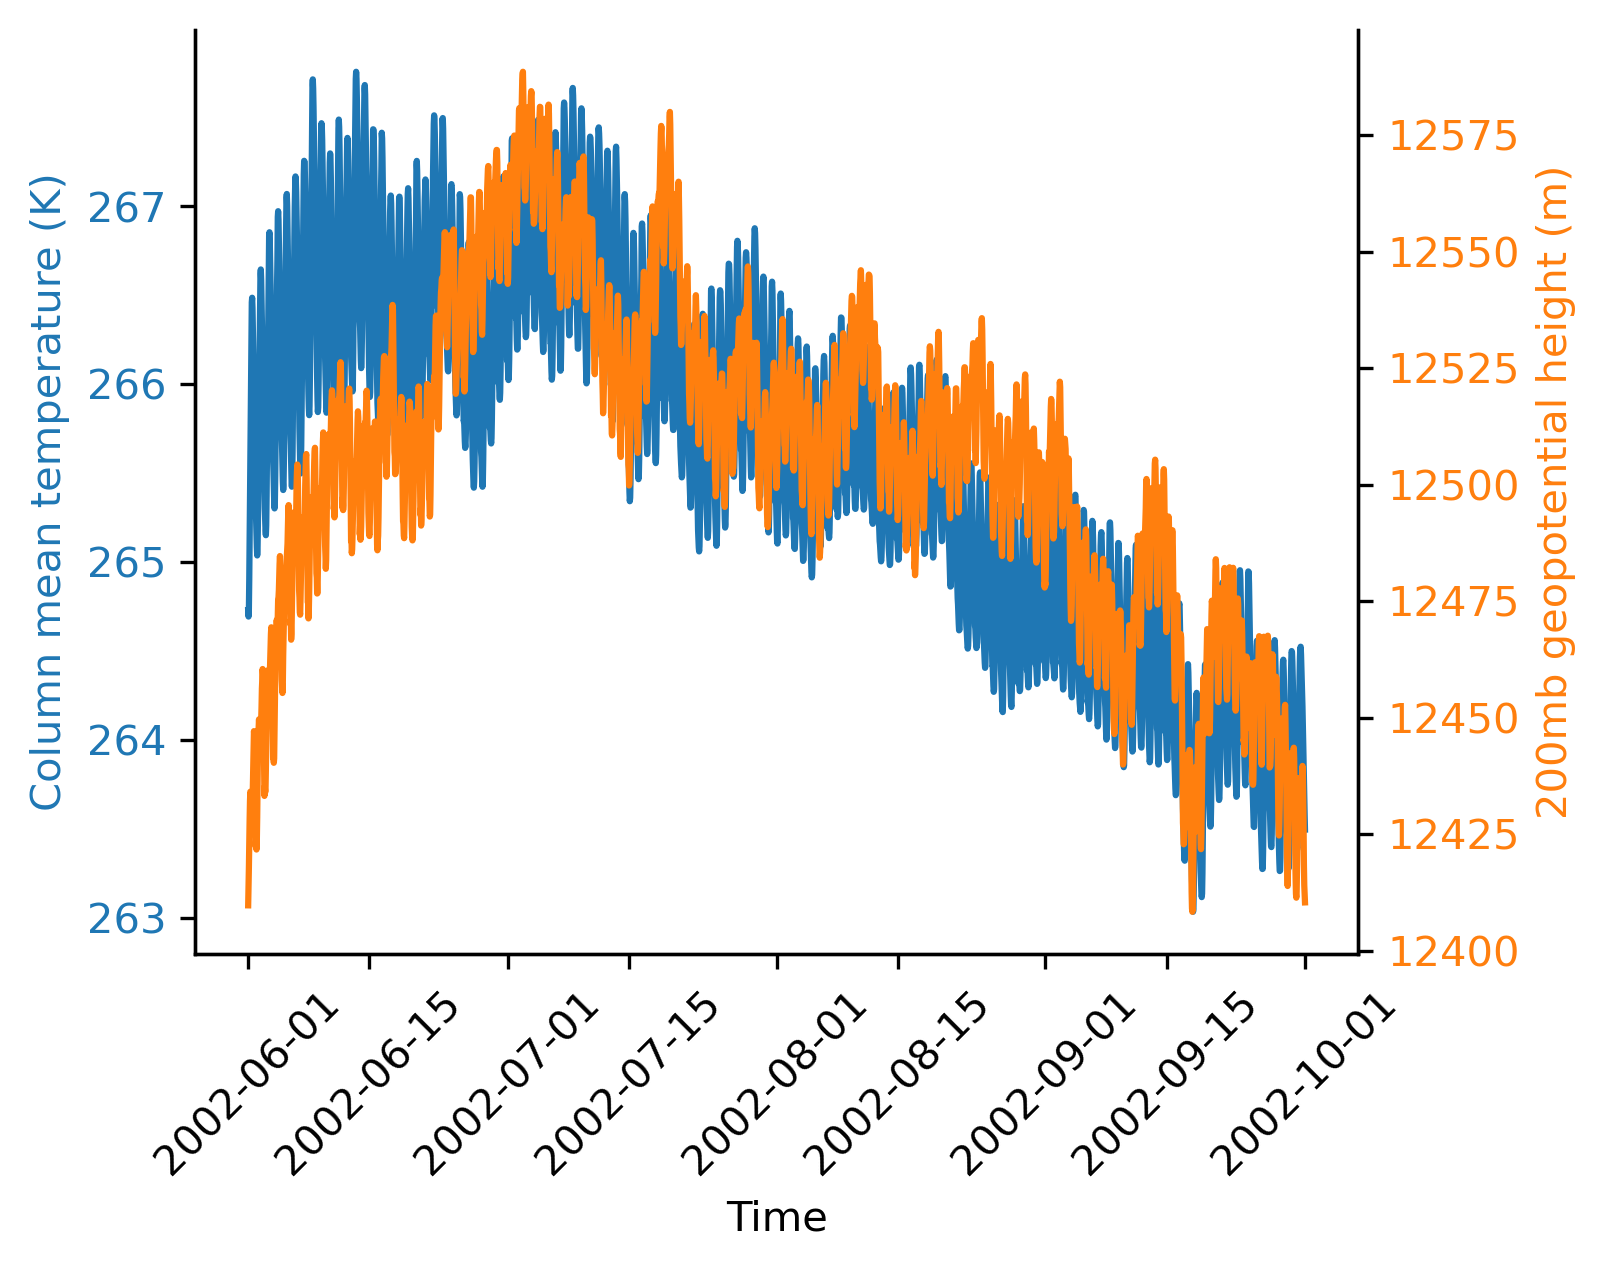

In [63]:
fig, ax1 = plt.subplots(figsize=(5,4))
ax1.plot(Tbar.time, Tbar)
ax1.set_xlabel('Time')
ax1.set_ylabel('Column mean temperature (K)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', labelrotation = 45)

ax2 = ax1.twinx()

ax2.plot(Tbar.time, H, c='tab:orange')
ax2.set_ylabel('200mb geopotential height (m)', c='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.spines['top'].set_visible(False)

In [19]:
Tbardaily = Tbar.groupby('time.dayofyear').mean('time')

In [9]:
b = '/media/rakshith/Seagate Expansion Drive/IMD/RFone_imd_rf_1x1_2002.nc'
imd=xr.open_dataset(b)

In [25]:
imd2 = imd.sel(TIME=slice('2002-06-01', '2002-09-30' ), LONGITUDE=slice(70, 90), LATITUDE=slice(10, 30))
imd3 = imd2.where(imdmask>0).mean(dim=['LONGITUDE', 'LATITUDE'])

In [26]:
#Mask for IMD
lon_grid, lat_grid = np.meshgrid(imd2.LONGITUDE, imd2.LATITUDE) #creating a land sea mask
imdmask = globe.is_land(lat_grid, lon_grid)

Text(0.5, 0.98, 'Indian region, JJAS')

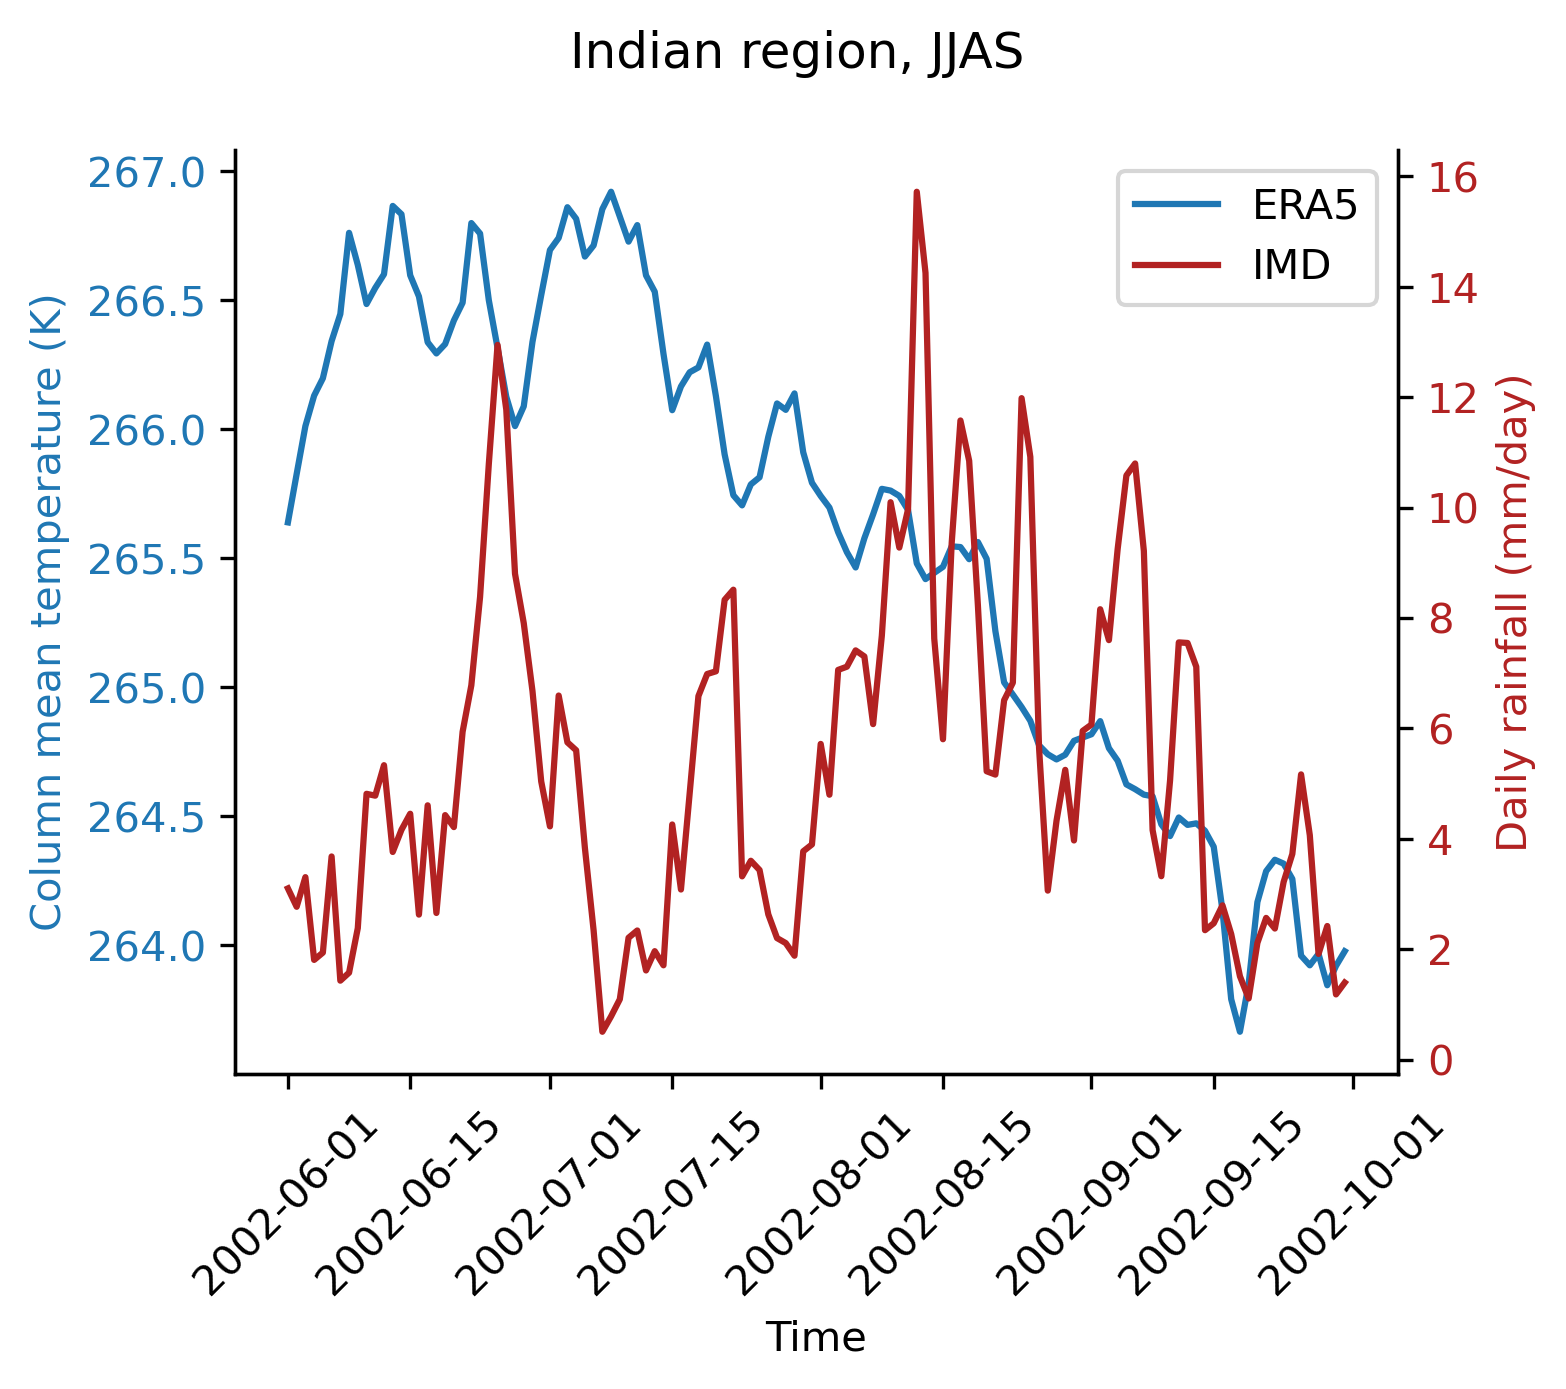

In [48]:
fig, ax1 = plt.subplots(figsize=(5,4))
ax1.plot(imd3.TIME, Tbardaily, label='ERA5')
ax1.set_xlabel('Time')
ax1.set_ylabel('Column mean temperature (K)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', labelrotation = 45)

ax2 = ax1.twinx()

ax2.plot(imd3.TIME, imd3.RAINFALL, c='firebrick', label='IMD')
ax2.set_ylabel('Daily rainfall (mm/day)', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')
ax2.spines['top'].set_visible(False)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.suptitle('Indian region, JJAS')

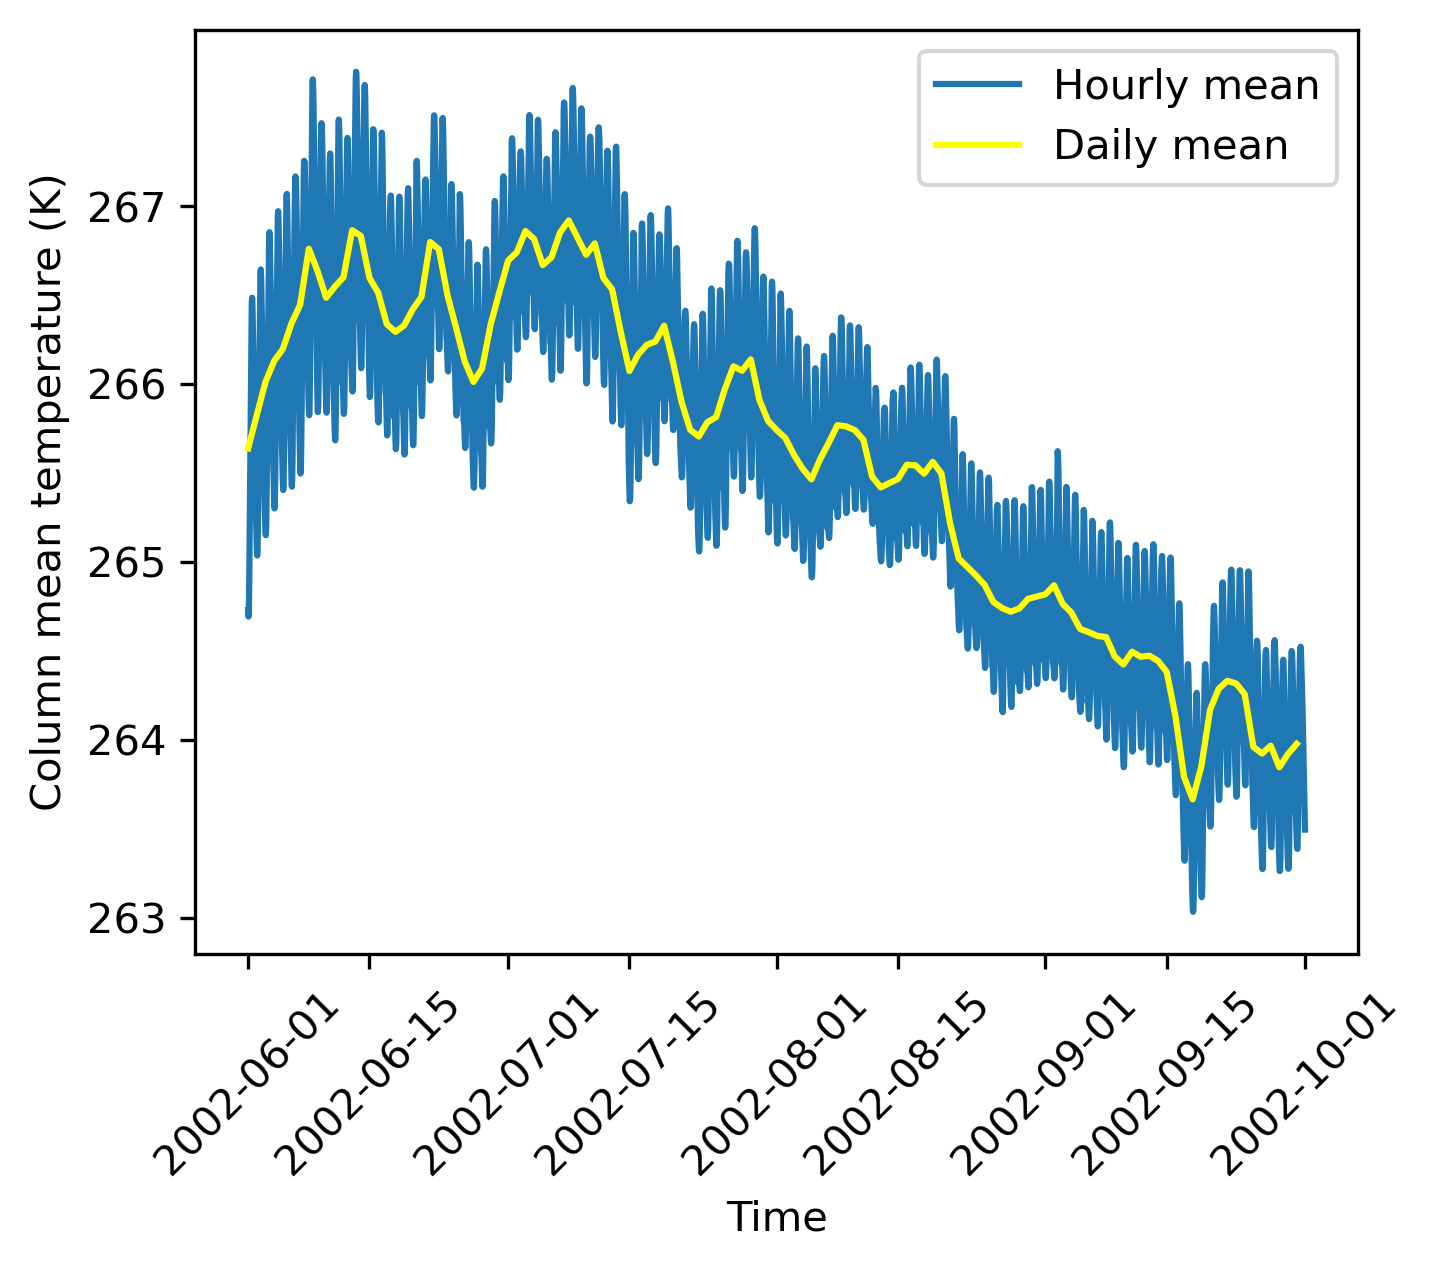

In [75]:
fig, ax1 = plt.subplots(figsize=(5,4))
ax1.plot(Tbar.time, Tbar, label='Hourly mean')
ax1.plot(imd3.TIME, Tbardaily, c='yellow', label='Daily mean')
ax1.set_xlabel('Time')
ax1.set_ylabel('Column mean temperature (K)')
ax1.tick_params(axis='x', labelrotation = 45)
ax1.legend()

Text(0.5, 0.98, 'Indian region, JJAS')

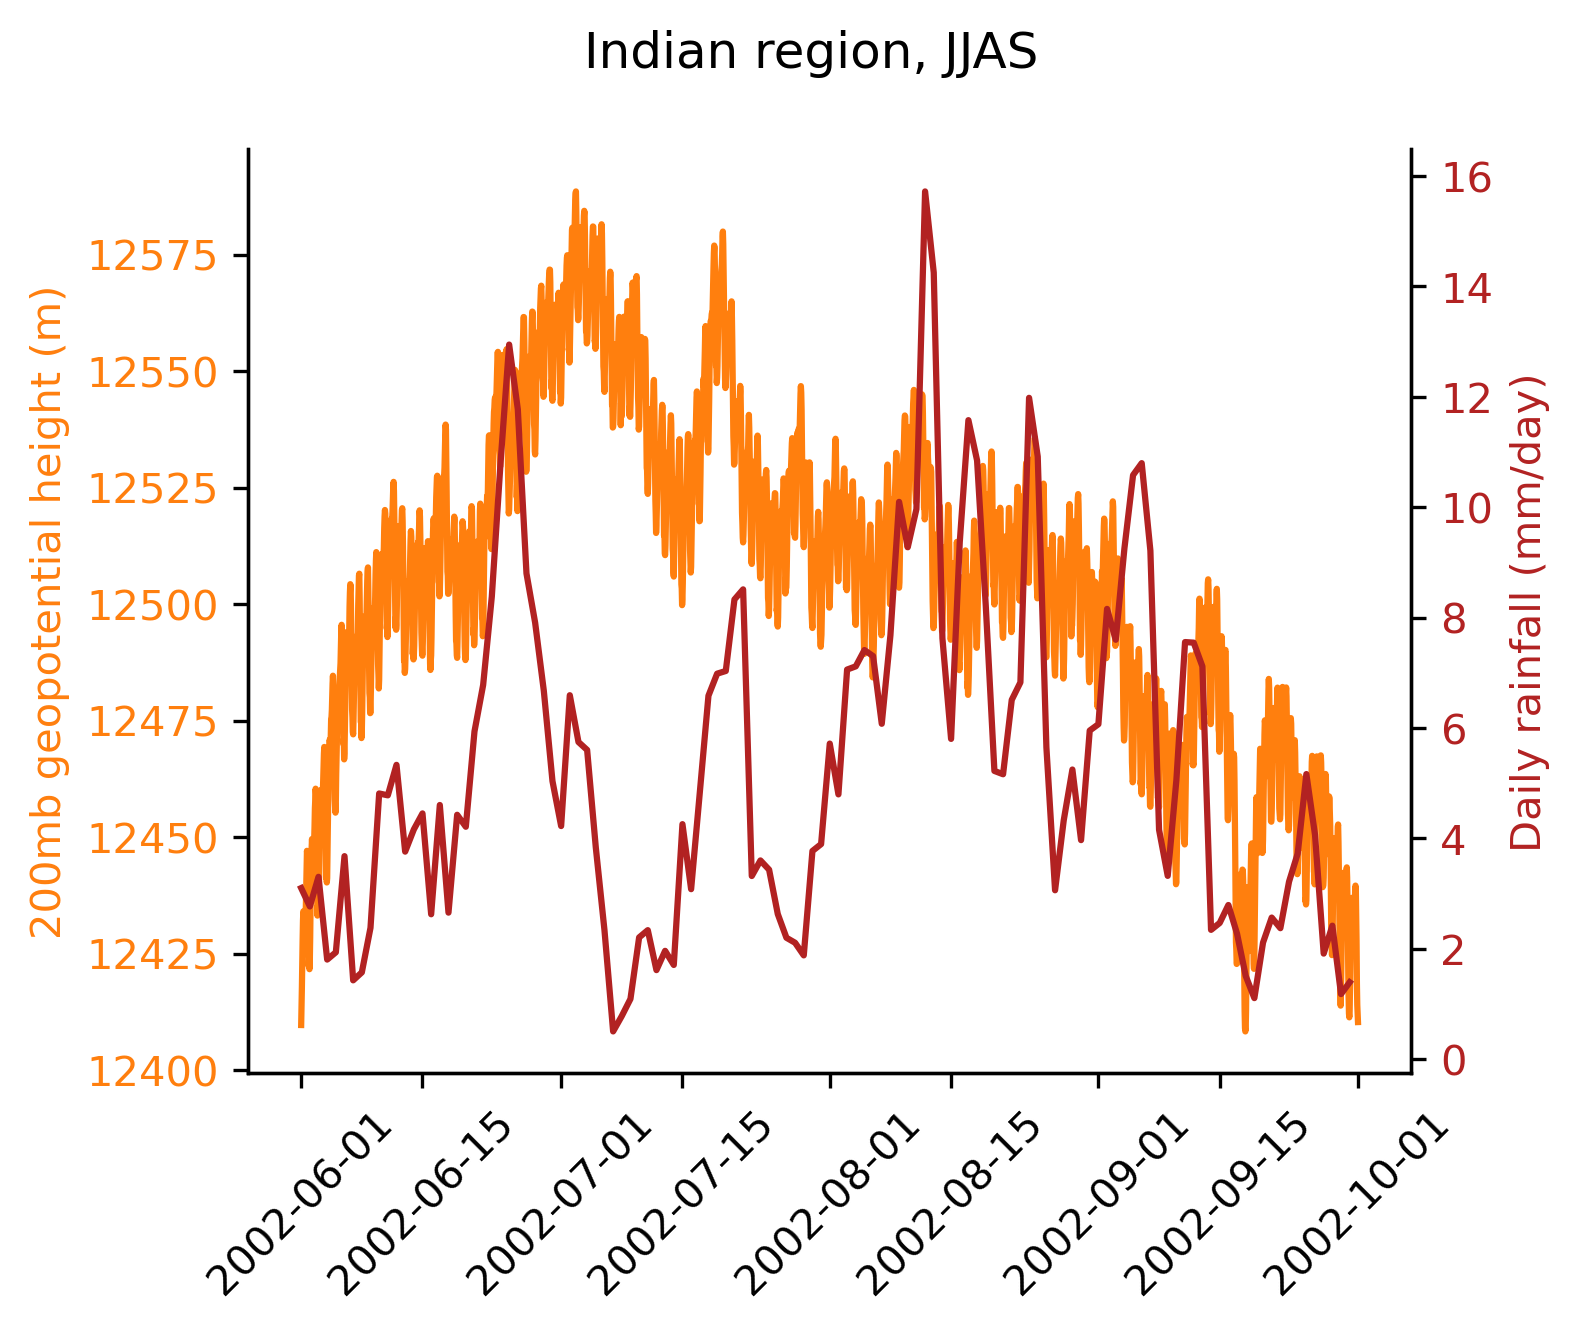

In [69]:
fig, ax1 = plt.subplots(figsize=(5,4))
ax1.plot(Tbar.time, H, c='tab:orange')
ax1.set_ylabel('200mb geopotential height (m)', c='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', labelrotation = 45)

ax2 = ax1.twinx()

ax2.plot(imd3.TIME, imd3.RAINFALL, c='firebrick')
ax2.set_ylabel('Daily rainfall (mm/day)', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')
ax2.spines['top'].set_visible(False)

plt.suptitle('Indian region, JJAS')

# Neelin result

In [2]:
f1 = '/media/rakshith/Seagate Expansion Drive/mraks/ERA hourly temp JFMAM 2002.nc'
f2 = '/media/rakshith/Seagate Expansion Drive/mraks/ERA hourly temp JJAS 2002.nc'
f3 = '/media/rakshith/Seagate Expansion Drive/mraks/ERA hourly temp OND 2002.nc'

In [3]:
dsfull = xr.open_mfdataset([f1, f2, f3])

In [4]:
lon_grid, lat_grid = np.meshgrid(dsfull.longitude, dsfull.latitude)
mask = globe.is_land(lat_grid, lon_grid)

In [5]:
Tmean = dsfull.t.where(mask>0).mean(dim=['latitude', 'longitude', 'level'])

In [ ]:
Tmean.plot()

In [6]:
f4 = '/media/rakshith/Seagate Expansion Drive/mraks/ERA hourly hourly prec, pwat 2002.nc'

In [7]:
dsp = xr.open_dataset(f4)

In [9]:
JJAS =  dsp.sel(time=slice('2002-06-01', '2002-09-30'))

In [10]:
grid1 = JJAS.where(mask>0).mean(dim=['latitude', 'longitude'])

In [11]:
prec = 86400*grid1.mtpr

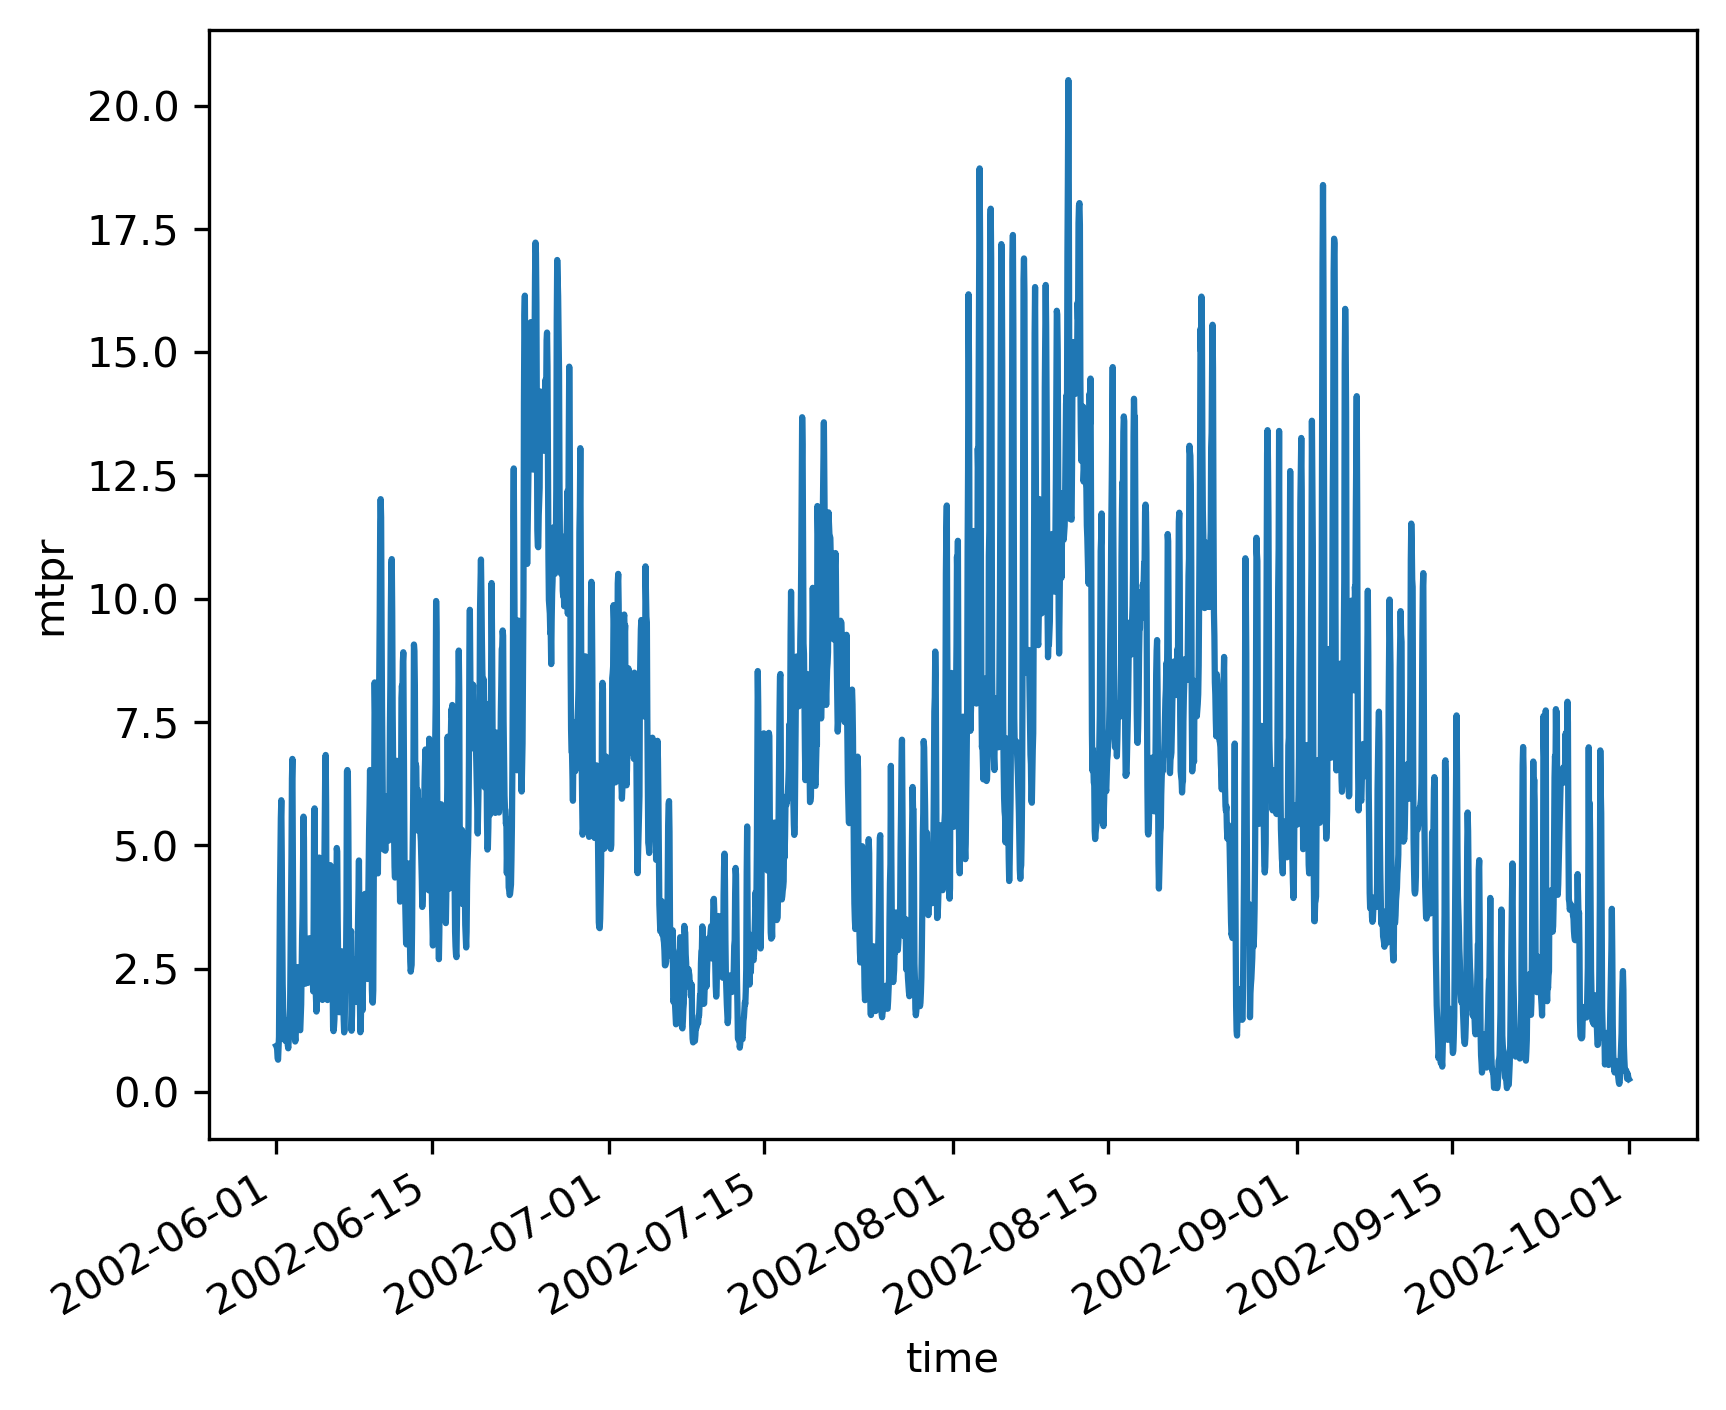

In [12]:
prec.plot()

In [8]:
P = 86400*dsp.mtpr.where(mask>0).mean(dim=['latitude', 'longitude'])
Pwat = dsp.tcwv.where(mask>0).mean(dim=['latitude', 'longitude',])

In [9]:
from scipy.stats import binned_statistic

In [10]:
b = np.arange(263, 268, 1)

In [ ]:
bin_means1, bin_edges1, binnumber1 = binned_statistic(Tmean, P, statistic='mean', bins=b)
bin_means2, bin_edges2, binnumber2 = binned_statistic(Tmean, Pwat, statistic='mean', bins=b)